# MNIST

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(name = 'mnist_784', version = 1)

In [4]:
print(type(mnist))
for attribute in dir(mnist):
    print(attribute, type(mnist[attribute]))

<class 'sklearn.utils.Bunch'>
DESCR <class 'str'>
categories <class 'NoneType'>
data <class 'pandas.core.frame.DataFrame'>
details <class 'dict'>
feature_names <class 'list'>
frame <class 'pandas.core.frame.DataFrame'>
target <class 'pandas.core.series.Series'>
target_names <class 'list'>
url <class 'str'>


In [5]:
import numpy as np

X = mnist['data']
y = mnist['target']

print(X.shape)
print(y.shape)

print(28 * 28 == X.shape[1])

print(np.min(X.values))
print(np.max(X.values))

print(y.dtypes)

print(y.value_counts())
print(y.value_counts(normalize = True))

(70000, 784)
(70000,)
True
0.0
255.0
category
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64
1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: class, dtype: float64


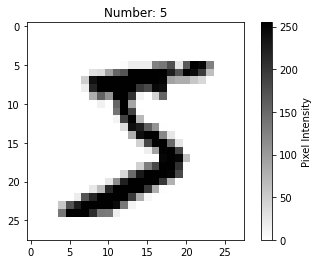

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.values[0]
some_digit_image = some_digit.reshape(28, 28)

fig, axes = plt.subplots()
image = axes.imshow(X = some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
axes.set_title(f'Number: {y[0]}')
color_bar = fig.colorbar(mappable = image)
color_bar.set_label('Pixel Intensity')
plt.show()

In [7]:
print(y.dtypes)
print(type(y[0]))
y = y.astype(dtype = np.uint8)
print(y.dtypes)

category
<class 'str'>
uint8


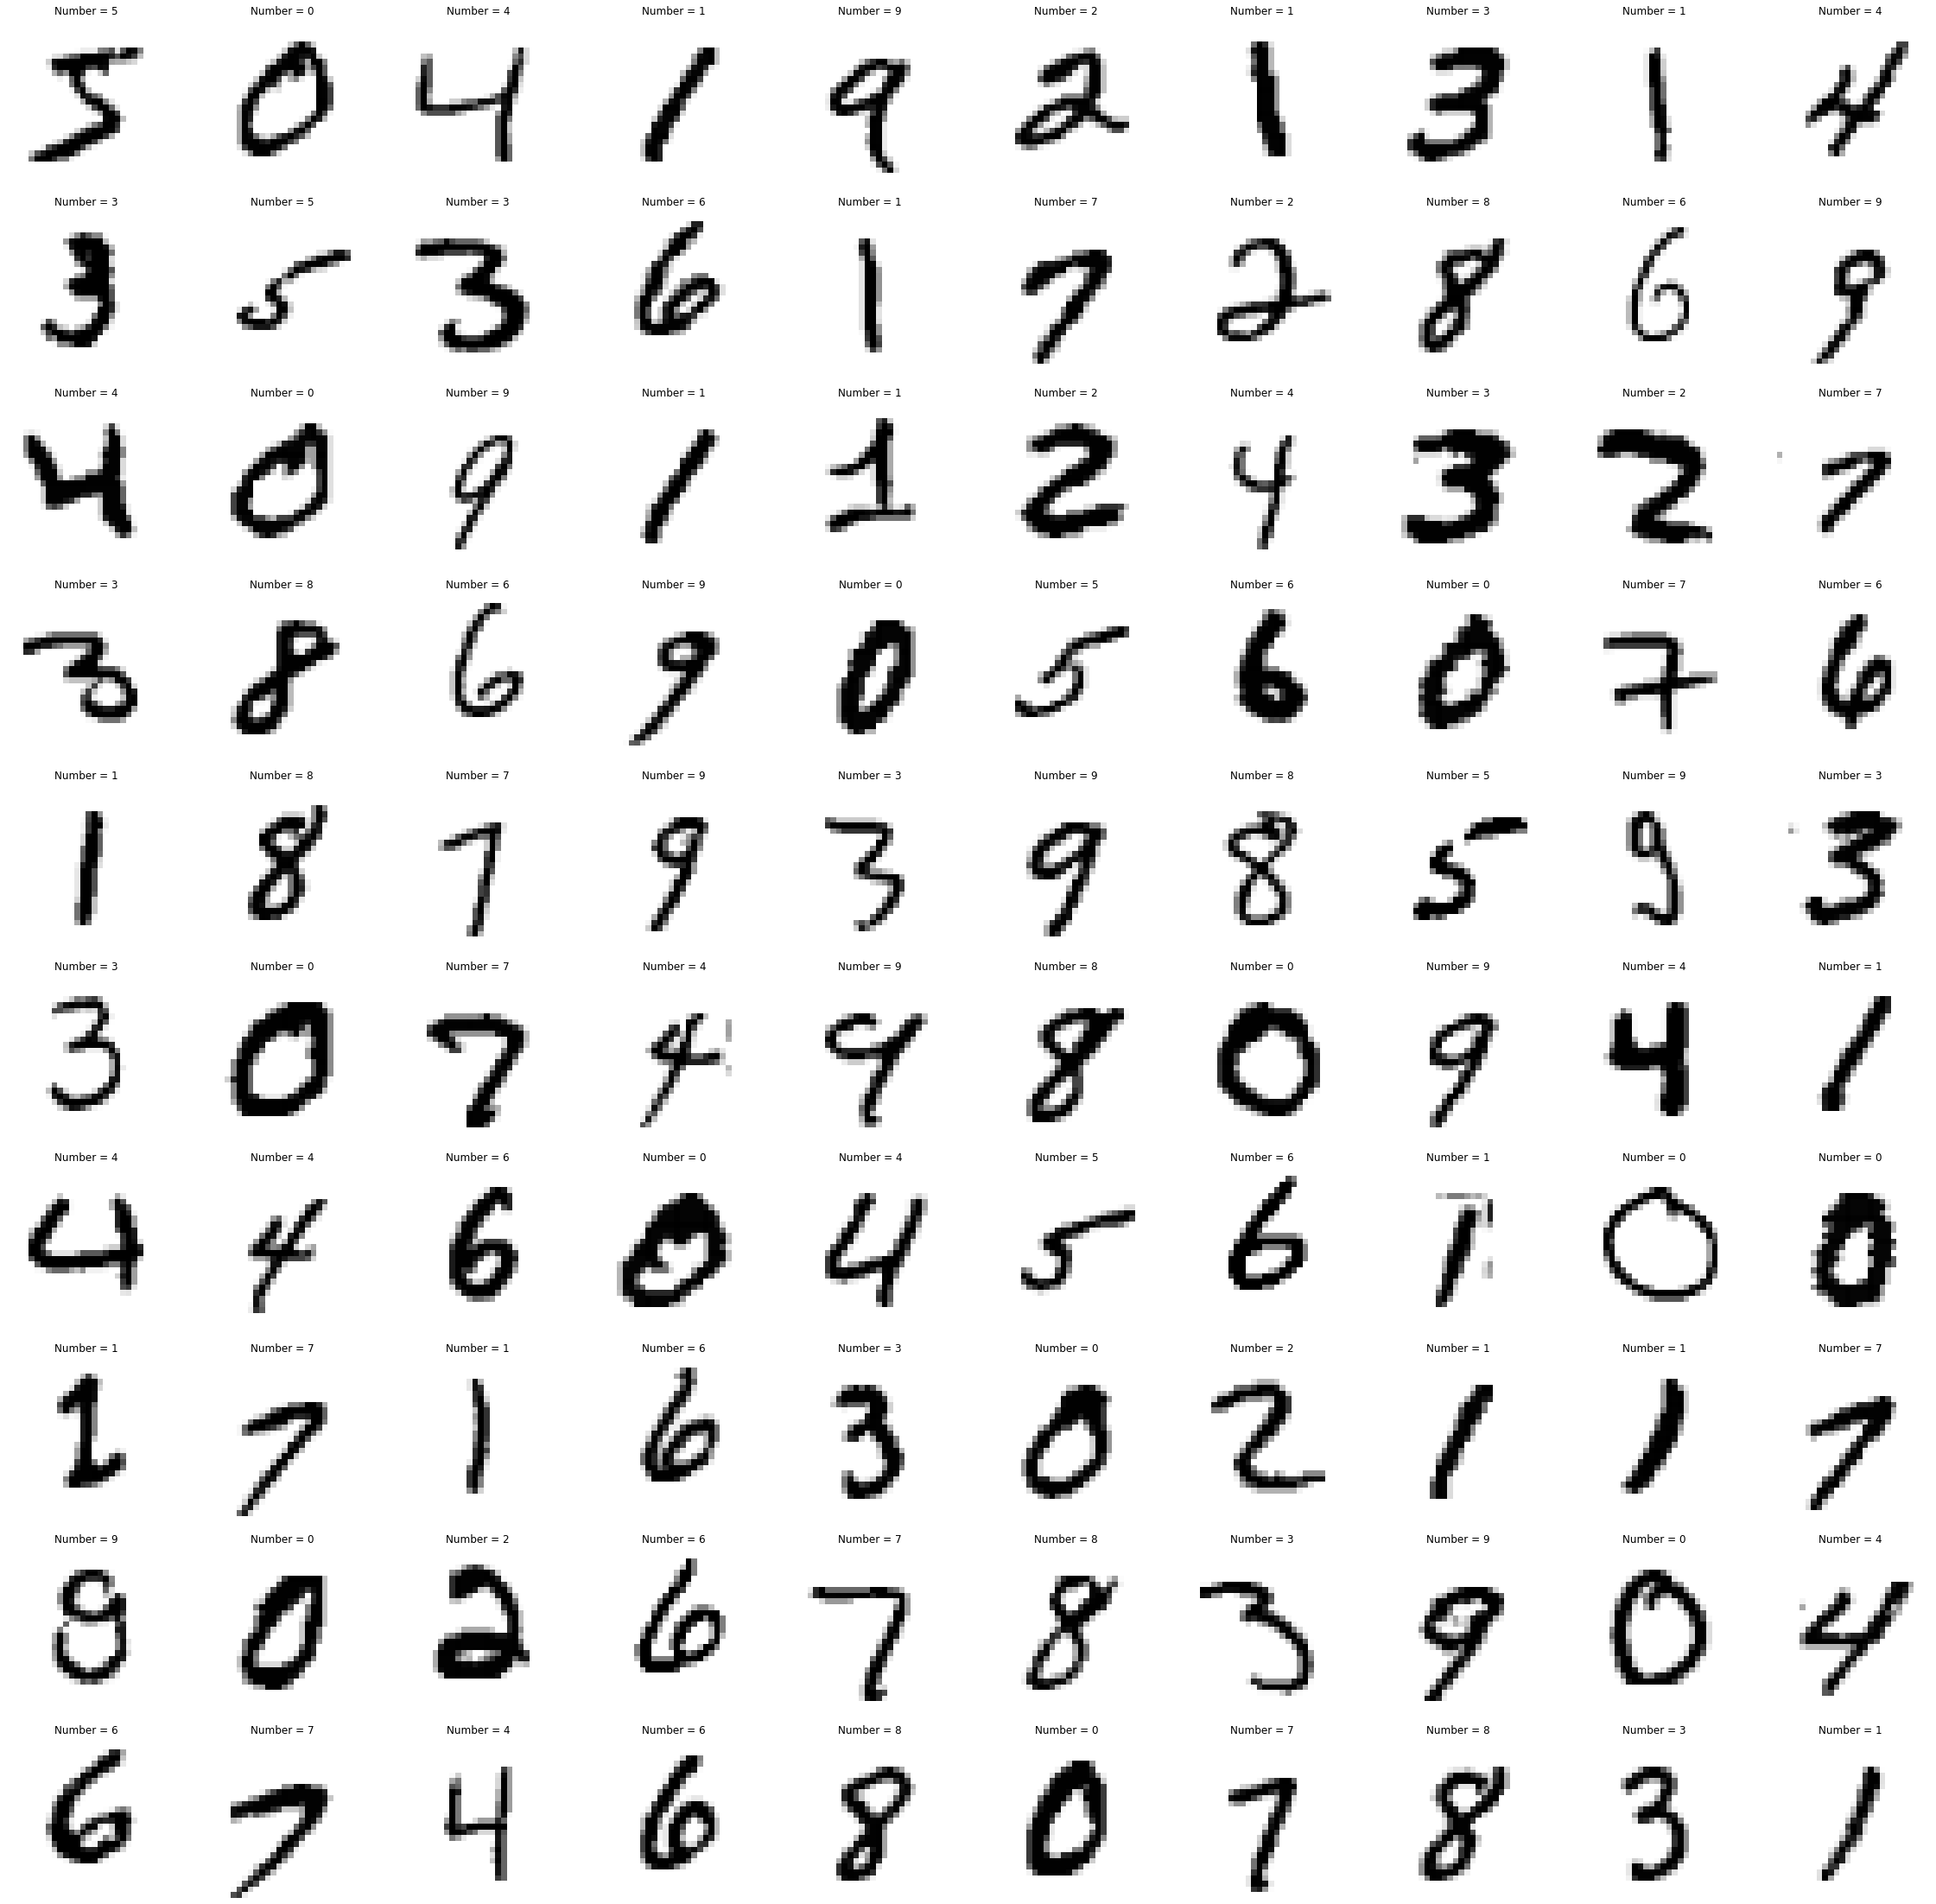

In [8]:
fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize = (40, 40))

for i in range(100):
    row = int(i / 10)
    col = i % 10
    digit = X.values[i].reshape(28, 28)
    axes[row][col].imshow(X = digit, cmap = mpl.cm.binary, interpolation = 'nearest')
    axes[row][col].set_title(f'Number = {y[i]}')
    axes[row][col].axis('off')
plt.show()

In [9]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Ensure the training and testing sets are already shuffled
# This does not check for many consecutive, similar instances
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: class, dtype: float64
1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
Name: class, dtype: float64


# Training a Binary Classifier

In [178]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [195]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42, max_iter = 1000, tol = 1e-3)
sgd_clf.fit(X = X_train, y = y_train_5)

SGDClassifier(random_state=42)

In [395]:
print(list(X_train.values[0]) == [X_train.values[0]])
print('=====')

for i in range(10):
    real = y_train[i]
    digit = [X_train.values[i]]
    prediction = sgd_clf.predict(X = digit)
    print(f'Real = {real}, Prediction = {prediction}')
print('=====')

predictions = sgd_clf.predict(X = X_train.values)

print(type(predictions))
print(type(predictions[0]))
print(type(True))
print(type(np.bool_(True)))
print(type(True) is type(np.bool_(True)))
print(type(True) == type(np.bool_(True)))
print(True is np.bool_(True))
print(True == np.bool_(True))

def manual_confusion_matrix(predictions, y_true):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for prediction, number in zip(predictions, y_true):
        if prediction == True and number == 5:
            true_positives += 1
        elif prediction == False and number != 5:
            true_negatives += 1
        elif prediction == True and number != 5:
            false_positives += 1
        elif prediction == False and number == 5:
            false_negatives += 1
    return true_positives, true_negatives, false_positives, false_negatives

(true_positives,
 true_negatives,
 false_positives,
 false_negatives) = manual_confusion_matrix(predictions, y_train)
print('TP =', true_positives)
print('TN =', true_negatives)
print('FP =', false_positives)
print('FN =', false_negatives)
assert true_positives + true_negatives + false_positives + false_negatives == len(predictions)

False
=====
Real = 5, Prediction = [ True]
Real = 0, Prediction = [False]
Real = 4, Prediction = [False]
Real = 1, Prediction = [False]
Real = 9, Prediction = [False]
Real = 2, Prediction = [False]
Real = 1, Prediction = [False]
Real = 3, Prediction = [False]
Real = 1, Prediction = [False]
Real = 4, Prediction = [False]
=====
<class 'numpy.ndarray'>
<class 'numpy.bool_'>
<class 'bool'>
<class 'numpy.bool_'>
False
False
False
True
TP = 4820
TN = 52316
FP = 2263
FN = 601


# Performance Measures
# Measuring Accuracy Using Cross-Validation
# Implementing Cross-Validation

In [346]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

for train_indices, test_indices in skfolds.split(X = X_train, y = y_train_5):
    clone_clf = clone(estimator = sgd_clf)
    X_train_folds = X_train.values[train_indices]
    y_train_folds = y_train.values[train_indices]
    X_test_folds = X_train.values[test_indices]
    y_test_folds = y_train.values[test_indices]
    clone_clf.fit(X = X_train_folds, y = y_train_folds)
    predictions = clone_clf.predict(X = X_test_folds)
    number_correct = sum(y_test_folds == predictions)
    print(number_correct / len(predictions))

0.8642
0.87215
0.88795


In [349]:
print(len(X_train))
print(len(y_train_5))

print(len(train_indices))
print(len(test_indices))

print(len(X_train) * ((skfolds.n_splits - 1) / skfolds.n_splits) == len(train_indices))
print(len(X_train) * (1 / skfolds.n_splits) == len(test_indices))

60000
60000
40000
20000
True
True


In [353]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = sgd_clf, X = X_train, y = y_train_5, cv = 3, scoring = 'accuracy')
print(scores)

[0.95035 0.96035 0.9604 ]


In [362]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
        
never_5_clf = Never5Classifier()
scores = cross_val_score(estimator = never_5_clf, X = X_train, y = y_train_5, cv = 3, scoring = 'accuracy')
print(scores)

[0.91125 0.90855 0.90915]


# Confusion Matrix

In [371]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(estimator = sgd_clf, X = X_train, y = y_train_5, cv = 3)
print(y_train_pred)

[ True False False ...  True False False]


In [403]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_true = y_train_5, y_pred = y_train_pred)
print(con_mat)
print('=====')
# true_positives, etc. are not from a cross-validated prediction
# confusion_matrix is from a cross-validated prediction
# It seems like false_positives and false_negatives should be switched to roughly match the values in the confusion matrix?
# Is this purely a result of one prediction being cross validated and the other not?
# To investigate, I use manual_confusion_matrix to check the logic in my calculation
print(con_mat[0][0], true_negatives)
print(con_mat[0][1], false_positives)
print(con_mat[1][0], false_negatives)
print(con_mat[1][1], true_positives)
print('=====')

# My calculation is correct
# It appears the difference is from cross validation (prefix cv in the variables below)
(cv_true_positives,
 cv_true_negatives,
 cv_false_positives,
 cv_false_negatives) = manual_confusion_matrix(y_train_pred, y_train)
print(con_mat[0][0], cv_true_negatives)
print(con_mat[0][1], cv_false_positives)
print(con_mat[1][0], cv_false_negatives)
print(con_mat[1][1], cv_true_positives)
assert cv_true_positives + cv_true_negatives + cv_false_positives + cv_false_negatives == len(y_train_pred)
print('=====')

y_train_perfect_predictions = y_train_5
print(confusion_matrix(y_true = y_train_5, y_pred = y_train_perfect_predictions))
print('=====')

y_train_bad_predictions = (y_train != 5)
print(confusion_matrix(y_true = y_train_5, y_pred = y_train_bad_predictions))

[[53892   687]
 [ 1891  3530]]
=====
53892 52316
687 2263
1891 601
3530 4820
=====
53892 53892
687 687
1891 1891
3530 3530
=====
[[54579     0]
 [    0  5421]]
=====
[[    0 54579]
 [ 5421     0]]


# Precision and Recall

In [405]:
from sklearn.metrics import precision_score, recall_score

prec_score = precision_score(y_true = y_train_5, y_pred = y_train_pred)
print(prec_score, cv_true_positives / (cv_true_positives + cv_false_positives))

rec_score = recall_score(y_true = y_train_5, y_pred = y_train_pred)
print(rec_score, cv_true_positives / (cv_true_positives + cv_false_negatives))

0.8370879772350012 0.8370879772350012
0.6511713705958311 0.6511713705958311


In [408]:
from sklearn.metrics import f1_score

print(f1_score(y_true = y_train_5, y_pred = y_train_pred), cv_true_positives / (cv_true_positives + (cv_false_negatives + cv_false_positives) / 2))

0.7325171197343846 0.7325171197343847


# Precision/Recall Tradeoff

In [417]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]
[False]


In [418]:
y_scores = cross_val_predict(estimator = sgd_clf, X = X_train, y = y_train_5, cv = 3, method = 'decision_function')
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [455]:
# Not sure how to interpret this, but it's in the author's github notebook
print(np.all(y_train_pred == (y_scores > 0)))

True


In [444]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = y_train_5, probas_pred = y_scores)

print(precisions)
print(recalls)
print(thresholds)

# Why are the lengths different?
# How do you know which element (first vs. last) to remove when plotting?
print(len(precisions))
print(len(recalls))
print(len(thresholds))

# The precision values are not always increasing
# The recall values are always decreasing
# The threshold values are always increasing
# This is reflected in Figure 3-4 of the book, and the figure below in this notebook
# This is also explained in the book, below Figure 3-4
print(np.all(precisions[:-1] <= precisions[1:]))
print(np.all(recalls[:-1] >= recalls[1:]))
print(np.all(thresholds[:-1] <= thresholds[1:]))

[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]
59967
59967
59966
False
True
True


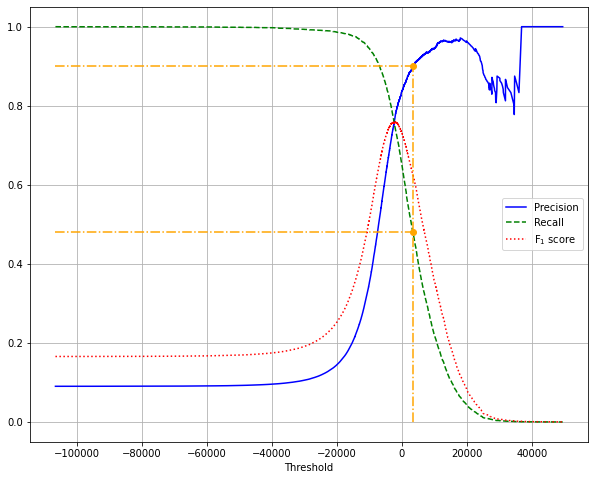

In [483]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig, axes = plt.subplots(figsize = (10, 8))
    axes.plot(thresholds, precisions[:-1], linestyle = 'solid', color = 'blue', label = 'Precision')
    axes.plot(thresholds, recalls[:-1], linestyle = 'dashed', color = 'green', label = 'Recall')
    axes.plot(thresholds, 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1]), linestyle = 'dotted', color = 'red', label = 'F$_{1}$ score')
    axes.set_xlabel('Threshold')
    axes.grid('on')
    axes.legend()
    
# Note that the figure in the book has different limits on the axes
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

recall_90_precision = recalls[np.argmax(precisions >= 0.9)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

axes = plt.gca()
axes.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], linestyle = 'dashdot', color = 'orange')
axes.plot([np.min(thresholds), threshold_90_precision], [0.9, 0.9], linestyle = 'dashdot', color = 'orange')
axes.plot(threshold_90_precision, 0.9, marker = 'o', linestyle = 'None', color = 'orange')
axes.plot([np.min(thresholds), threshold_90_precision], [recall_90_precision, recall_90_precision], linestyle = 'dashdot', color = 'orange')
axes.plot(threshold_90_precision, recall_90_precision, marker = 'o', linestyle = 'None', color = 'orange')
plt.show()


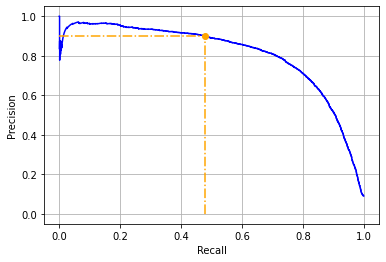

In [491]:
fig, axes = plt.subplots()
axes.plot(recalls, precisions, color = 'blue')
axes.plot([recall_90_precision, recall_90_precision], [0, 0.9], linestyle = 'dashdot', color = 'orange')
axes.plot([0, recall_90_precision], [0.9, 0.9], linestyle = 'dashdot', color = 'orange')
axes.plot(recall_90_precision, 0.9, marker = 'o', linestyle = 'None', color = 'orange')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.grid('on')
plt.show()

In [494]:
print(threshold_90_precision)

y_train_pred_90 = (y_scores >= threshold_90_precision)
print(y_train_pred_90)

prec_score = precision_score(y_true = y_train_5, y_pred = y_train_pred_90)
print(prec_score)

rec_score = recall_score(y_true = y_train_5, y_pred = y_train_pred_90)
print(rec_score)

3370.019499143958
[False False False ...  True False False]
0.9000345901072293
0.4799852425751706


# The ROC Curve

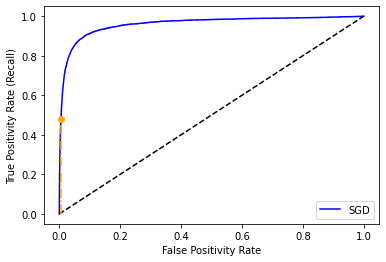

In [562]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true = y_train_5, y_score = y_scores)

# Remember, tpr is another term for the recall
fpr_90_precision = fpr[np.argmax(tpr >= recall_90_precision)]

fig, axes = plt.subplots()
axes.plot(fpr, tpr, linestyle = 'solid', color = 'blue', label = 'SGD')
axes.plot([0, 1], [0, 1], linestyle = 'dashed', color = 'black')
axes.plot([fpr_90_precision, fpr_90_precision], [0, recall_90_precision], linestyle = 'dashdot', color = 'orange')
axes.plot([0, fpr_90_precision], [recall_90_precision, recall_90_precision], linestyle = 'dashdot', color = 'orange')
axes.plot(fpr_90_precision, recall_90_precision, marker = 'o', linestyle = 'None', color = 'orange')
axes.set_xlabel('False Positivity Rate')
axes.set_ylabel('True Positivity Rate (Recall)')
axes.legend()
plt.show()

In [563]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_true = y_train_5, y_score = y_scores))

from scipy.integrate import trapz, simps
print(trapz(y = tpr, x = fpr))
#print(simps(y = tpr, x = fpr))

0.9604938554008616
0.9604938554008616


In [579]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
y_probas_forest = cross_val_predict(estimator = forest_clf, X = X_train, y = y_train_5, cv = 3, method = 'predict_proba')
print(y_probas_forest)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]


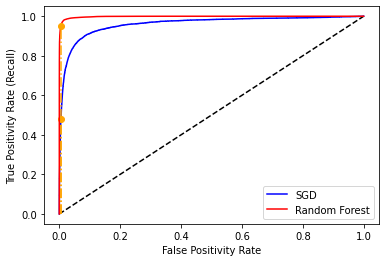

In [580]:
fig, axes = plt.subplots()
axes.plot(fpr, tpr, linestyle = 'solid', color = 'blue', label = 'SGD')
axes.plot([0, 1], [0, 1], linestyle = 'dashed', color = 'black')
axes.plot([fpr_90_precision, fpr_90_precision], [0, recall_90_precision], linestyle = 'dashdot', color = 'orange')
axes.plot([0, fpr_90_precision], [recall_90_precision, recall_90_precision], linestyle = 'dashdot', color = 'orange')
axes.plot(fpr_90_precision, recall_90_precision, marker = 'o', linestyle = 'None', color = 'orange')
axes.set_xlabel('False Positivity Rate')
axes.set_ylabel('True Positivity Rate (Recall)')

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_true = y_train_5, y_score = y_scores_forest)
axes.plot(fpr_forest, tpr_forest, linestyle = 'solid', color = 'red', label = 'Random Forest')
# Note argmax, not argmin
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90_precision)]

axes.plot([fpr_90_precision, fpr_90_precision], [0, recall_for_forest], linestyle = 'dashdot', color = 'orange')
axes.plot([0, fpr_90_precision], [recall_for_forest, recall_for_forest], linestyle = 'dashdot', color = 'orange')
axes.plot(fpr_90_precision, recall_for_forest, marker = 'o', linestyle = 'None', color = 'orange')

axes.legend()
plt.show()

In [584]:
print(roc_auc_score(y_true = y_train_5, y_score = y_scores_forest))

y_train_pred = cross_val_predict(estimator = forest_clf, X = X_train, y = y_train_5, cv = 3)

print(precision_score(y_true = y_train_5, y_pred = y_train_pred))
print(recall_score(y_true = y_train_5, y_pred = y_train_pred))

0.9983436731328145
0.9905083315756169
0.8662608374838591


# Multiclass Classification

In [679]:
# This cell contains parts in the author's online github notebook, but not in the book
from sklearn.svm import SVC

svm_clf = SVC(gamma = 'auto', random_state = 42)
svm_clf.fit(X = X_train[:1000], y = y_train[:1000])

svm_clf.predict([some_digit])
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)
print(np.argmax(some_digit_scores))

for score, classification in sorted(zip(some_digit_scores[0], svm_clf.classes_), reverse = True):
    print(classification, score)

[[ 2.81585438  7.09167958  3.82972099  0.79365551  5.8885703   9.29718395
   1.79862509  8.10392157 -0.228207    4.83753243]]
5
5 9.29718394959736
7 8.10392156862745
1 7.09167957552125
4 5.88857029540903
9 4.837532425358548
2 3.829720994180981
0 2.8158543781899885
6 1.7986250892710474
3 0.793655513467804
8 -0.22820700364595142


In [590]:
sgd_clf.fit(X = X_train, y = y_train)

SGDClassifier(random_state=42)

In [616]:
print(sgd_clf.predict([some_digit]))

predictions = sgd_clf.predict(X = X_train)

number_correct = 0
number_incorrect = 0
for prediction, number in zip(predictions, y_train):
    if prediction == number:
        number_correct += 1
    elif prediction != number:
        number_incorrect += 1

assert number_correct + number_incorrect == len(y_train)
print(number_correct / (number_correct + number_incorrect))
print(number_incorrect / (number_correct + number_incorrect))

[3]
0.8807666666666667
0.11923333333333333


In [633]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

class_with_largest_score = np.argmax(some_digit_scores)
print(class_with_largest_score)

print(predictions[0])

assert class_with_largest_score == predictions[0]

print(sgd_clf.classes_)
print(sgd_clf.classes_[class_with_largest_score])

for score, classification in sorted(zip(some_digit_scores[0], sgd_clf.classes_), reverse = True):
    print(classification, score)

[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
3
3
[0 1 2 3 4 5 6 7 8 9]
3
3 1823.7315403079076
5 -1385.804788945628
8 -4604.354912743627
2 -9530.639507393267
9 -12050.767298003786
7 -16147.513239972779
4 -22320.148228778264
6 -26188.910709508506
0 -31893.030954190526
1 -34419.69069632278


In [637]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X = X_train, y = y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [682]:
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))
# Page 102 of book: N * (N - 1) / 2 = 10 * (10 - 1) / 2 = 45
N = len(set(y_train))
assert N == len(ovo_clf.classes_)
assert len(ovo_clf.estimators_) == N * (N - 1) / 2

some_digit_scores = ovo_clf.decision_function([some_digit])
print(some_digit_scores)

class_with_largest_score = np.argmax(some_digit_scores)
print(class_with_largest_score)

for score, classification in sorted(zip(some_digit_scores[0], ovo_clf.classes_), reverse = True):
    print(classification, score)

# Need to figure out how to do the below ...
# Page 102 of book: "see which class wins the most duels"
#predictions = []
#for estimator in ovo_clf.estimators_:
#    predictions.append(estimator.predict([some_digit]))
#print(predictions)

[5]
45
[[2.66666696 3.66666714 5.33333258 8.33333319 0.6666669  9.33333315
  0.66666684 2.66666841 5.33333214 6.33333275]]
5
5 9.333333153276163
3 8.333333185085554
9 6.333332745097656
2 5.333332583404876
8 5.333332139352104
1 3.6666671448859294
7 2.666668411720405
0 2.6666669610764515
4 0.6666668989291209
6 0.666666838961368


In [669]:
forest_clf.fit(X = X_train, y = y_train)

RandomForestClassifier(random_state=42)

In [675]:
print(forest_clf.predict([some_digit]))
some_digit_prediction_probabilities = forest_clf.predict_proba([some_digit])
print(some_digit_prediction_probabilities)
print(np.argmax(some_digit_prediction_probabilities))

for probability, classification in sorted(zip(some_digit_prediction_probabilities[0], ovo_clf.classes_), reverse = True):
    print(classification, probability)

[5]
[[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]
5
5 0.9
3 0.08
9 0.01
2 0.01
8 0.0
7 0.0
6 0.0
4 0.0
1 0.0
0 0.0


In [683]:
scores = cross_val_score(estimator = sgd_clf, X = X_train, y = y_train, cv = 3, scoring = 'accuracy')
print(scores)

[0.87365 0.85835 0.8689 ]


In [781]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X = X_train.astype(np.float64))

In [782]:
column_means = np.mean(a = X_train, axis = 0)
assert np.all(column_means == scaler.mean_)

column_variances = np.var(a = X_train, axis = 0)
assert np.all(column_variances == scaler.var_)

column_stds = np.std(a = X_train, axis = 0)
assert np.all(column_stds == np.sqrt(column_variances))

X_train_scaled_manual = X_train.copy().values.T # Based on id, I don't think copy is necessary
for row, mu, sigma in zip(X_train_scaled_manual, column_means, column_stds):
    row[:] = [(x - mu) / sigma if sigma != 0 else x for x in row]
X_train_scaled_manual = X_train_scaled_manual.T
assert np.all(X_train_scaled_manual == X_train_scaled)

In [783]:
scores = cross_val_score(estimator = sgd_clf, X = X_train_scaled, y = y_train, cv = 3, scoring = 'accuracy')
print(scores)

[0.8983 0.891  0.9018]


# Error Analysis

In [784]:
y_train_pred = cross_val_predict(estimator = sgd_clf, X = X_train_scaled, y = y_train, cv = 3)

In [785]:
conf_mx = confusion_matrix(y_true = y_train, y_pred = y_train_pred)
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


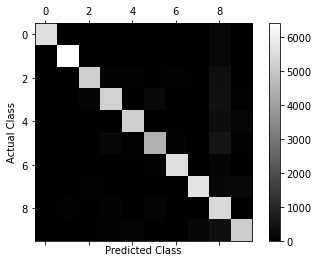

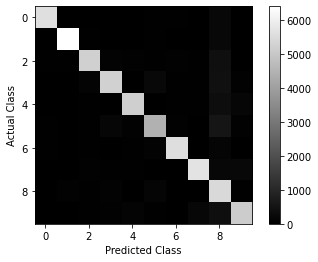

In [813]:
fig, axes = plt.subplots()
image = axes.matshow(conf_mx, cmap = plt.cm.gray)
fig.colorbar(mappable = image, ax = axes)
axes.set_xlabel('Predicted Class')
axes.set_ylabel('Actual Class')
plt.show()

fig, axes = plt.subplots()
image = axes.imshow(X = conf_mx, cmap = plt.cm.gray, origin = 'upper', aspect = 'equal', interpolation = 'nearest')
fig.colorbar(mappable = image, ax = axes)
axes.set_xlabel('Predicted Class')
axes.set_ylabel('Actual Class')
plt.show()

1 0.11236666666666667 6400
7 0.10441666666666667 5684
3 0.10218333333333333 5227
2 0.0993 5220
9 0.09915 5107
0 0.09871666666666666 5577
6 0.09863333333333334 5552
8 0.09751666666666667 5429
4 0.09736666666666667 5182
5 0.09035 4444


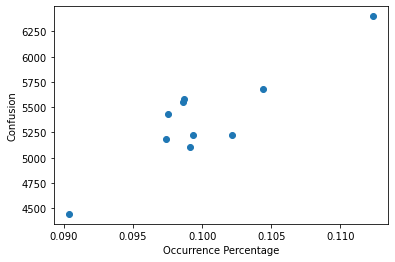

In [811]:
values = []
percentages = []
confusions = []
for value, percentage in y_train.value_counts(normalize = True).items():
    confusion = conf_mx[value][value]
    print(value, percentage, confusion)
    values.append(value)
    percentages.append(percentage)
    confusions.append(confusion)

fig, axes = plt.subplots()
axes.scatter(percentages, confusions)
axes.set_xlabel('Occurrence Percentage')
axes.set_ylabel('Confusion')
plt.show()

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[ 3 12 21]
[[ 3]
 [12]
 [21]]
[[0.         0.08333333 0.0952381 ]
 [1.         0.33333333 0.23809524]
 [2.         0.58333333 0.38095238]]
[[0.         0.33333333 0.66666667]
 [0.25       0.33333333 0.41666667]
 [0.28571429 0.33333333 0.38095238]]
True
True
True
[ True]
[ True]
[ True]


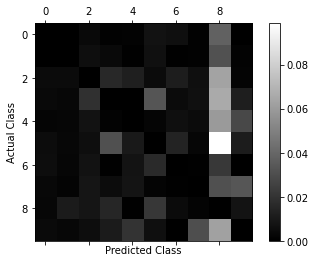

In [850]:
# Testing parameter 'keepdims'
test = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
test_sum_1 = np.sum(a = test, axis = 1)
test_sum_2 = np.sum(a = test, axis = 1, keepdims = True)
test_mat_1 = test / test_sum_1
test_mat_2 = test / test_sum_2

print(test)
print(test_sum_1)
print(test_sum_2)
print(test_mat_1)
print(test_mat_2)

print(test_mat_1[0][0] == test[0][0] / test_sum_1[0])
print(test_mat_1[0][1] == test[0][1] / test_sum_1[1])
print(test_mat_1[0][2] == test[0][2] / test_sum_1[2])

print(test_mat_2[0][0] == test[0][0] / test_sum_2[0])
print(test_mat_2[0][1] == test[0][1] / test_sum_2[0])
print(test_mat_2[0][2] == test[0][2] / test_sum_2[0])

row_sums = np.sum(a = conf_mx, axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(a = norm_conf_mx, val = 0)

fig, axes = plt.subplots()
image = axes.matshow(norm_conf_mx, cmap = plt.cm.gray)
fig.colorbar(mappable = image, ax = axes)
axes.set_xlabel('Predicted Class')
axes.set_ylabel('Actual Class')
plt.show()

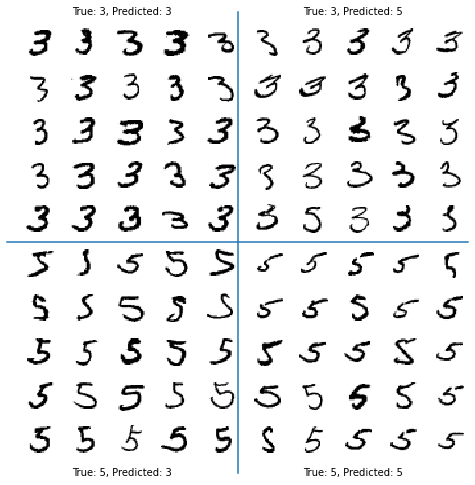

In [898]:
import matplotlib.lines as lines

class_a, class_b = 3, 5
X_aa = X_train[(y_train == class_a) & (y_train_pred == class_a)]
X_ab = X_train[(y_train == class_a) & (y_train_pred == class_b)]
X_ba = X_train[(y_train == class_b) & (y_train_pred == class_a)]
X_bb = X_train[(y_train == class_b) & (y_train_pred == class_b)]

#print(X_aa)
#print(X_ab)
#print(X_ba)
#print(X_bb)

fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize = (8, 8))

for i in range(25):
    
    digit_aa = X_aa.values[i].reshape(28, 28)
    digit_ab = X_ab.values[i].reshape(28, 28)
    digit_ba = X_ba.values[i].reshape(28, 28)
    digit_bb = X_bb.values[i].reshape(28, 28)
    
    row = int(i / 5)
    col = i % 5
        
    axes[row][col].imshow(X = digit_aa, cmap = mpl.cm.binary, interpolation = 'nearest')
    axes[row][col].axis('off')

    axes[row][col + 5].imshow(X = digit_ab, cmap = mpl.cm.binary, interpolation = 'nearest')
    axes[row][col + 5].axis('off')
    
    axes[row + 5][col].imshow(X = digit_ba, cmap = mpl.cm.binary, interpolation = 'nearest')
    axes[row + 5][col].axis('off')
    
    axes[row + 5][col + 5].imshow(X = digit_bb, cmap = mpl.cm.binary, interpolation = 'nearest')
    axes[row + 5][col + 5].axis('off')
    
fig.add_artist(lines.Line2D([0.5, 0.5], [0.1, 0.9]))
fig.add_artist(lines.Line2D([0.1, 0.9], [0.5, 0.5]))
fig.text(x = 0.30, y = 0.90, s = f'True: {class_a}, Predicted: {class_a}', horizontalalignment = 'center', verticalalignment = 'center')
fig.text(x = 0.70, y = 0.90, s = f'True: {class_a}, Predicted: {class_b}', horizontalalignment = 'center', verticalalignment = 'center')
fig.text(x = 0.30, y = 0.10, s = f'True: {class_b}, Predicted: {class_a}', horizontalalignment = 'center', verticalalignment = 'center')
fig.text(x = 0.70, y = 0.10, s = f'True: {class_b}, Predicted: {class_b}', horizontalalignment = 'center', verticalalignment = 'center')
plt.show()

# Multilabel Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X = X_train, y = y_multilabel)

print(y_train[0])
print(knn_clf.predict(X = [some_digit]))

5
[[False  True]]


In [914]:
y_train_knn_pred = cross_val_predict(estimator = knn_clf, X = X_train, y = y_multilabel, cv = 3)

In [916]:
print(y_train_knn_pred)
print(f1_score(y_true = y_multilabel, y_pred = y_train_knn_pred, average = 'macro'))

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]
0.976410265560605


# Multioutput Classification

[[40 18 15 ... 32 18 53]
 [40 34 67 ...  8 78 92]
 [45 92 83 ... 68 94 28]
 ...
 [28  6 82 ... 93 75 45]
 [68 79 66 ... 31 72 39]
 [17 74 49 ... 99  4 52]]


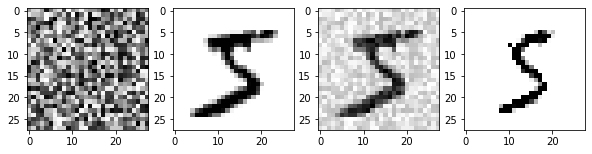

In [990]:
# Only fit with the training data

noise_train = np.random.randint(low = 0, high = 100, size = (len(X_train.values), len(X_train.values[0])))
X_train_mod = X_train + noise_train
y_train_mod = X_train
print(noise_train)

knn_clf.fit(X = X_train_mod, y = y_train_mod)

index = 0
clean_digit = knn_clf.predict([X_train_mod.values[index]]) # clean_digit will be different every time this cell is run

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 5))
axes[0].imshow(X = noise_train[index].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
axes[1].imshow(X = X_train.values[index].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
axes[2].imshow(X = X_train_mod.values[index].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
axes[3].imshow(X = clean_digit.reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
plt.show()

[[23 11 57 ... 86 58 55]
 [43 22 64 ... 36 70 74]
 [31  7 35 ... 94 29 32]
 ...
 [80 65 74 ... 74 77 74]
 [48  2 49 ... 99 57 68]
 [14 13 43 ... 53 85  5]]


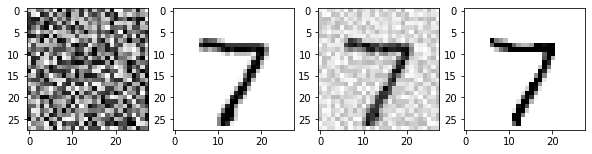

In [996]:
# Now check with the test data

noise_test = np.random.randint(low = 0, high = 100, size = (len(X_test.values), len(X_test.values[0])))
X_test_mod = X_test + noise_test
y_test_mod = X_test
print(noise_test)

index = 0
clean_digit = knn_clf.predict([X_test_mod.values[index]]) # clean_digit will be different every time this cell is run

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 5))
axes[0].imshow(X = noise_test[index].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
axes[1].imshow(X = X_test.values[index].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
axes[2].imshow(X = X_test_mod.values[index].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
axes[3].imshow(X = clean_digit.reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')
plt.show()

# Exercise 1

In [998]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

parameter_grid = [
    {'n_neighbors': [3, 4, 5], # default is 5
     'weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(estimator = knn_clf, param_grid = parameter_grid, cv = 5, verbose = 3, scoring = 'accuracy', return_train_score = True)

grid_search.fit(X = X_train, y = y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform;, score=(train=0.985, test=0.972) total time=  11.0s
[CV 2/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.971) total time=  10.3s
[CV 3/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.969) total time=  10.8s
[CV 4/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.969) total time=  10.3s
[CV 5/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.970) total time=  10.4s
[CV 1/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.972) total time=  10.1s
[CV 2/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.972) total time=  10.2s
[CV 3/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.970) total time=  10.1s
[CV 4/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.970) total time=  10.2s
[CV 5/5] END n_neighbors=3, weights=distance;, score=(train=1.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [999]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_)

KNeighborsClassifier(n_neighbors=4, weights='distance')
{'n_neighbors': 4, 'weights': 'distance'}
0.9716166666666666
{'mean_fit_time': array([0.28221984, 0.17530251, 0.17780566, 0.29097509, 0.19690704,
       0.19960999]), 'std_fit_time': array([0.21910684, 0.00158061, 0.00477065, 0.20867856, 0.01379994,
       0.00895371]), 'mean_score_time': array([ 10.27560835,  10.00322504,  16.74090362, 218.80714846,
        14.99409738,  13.94673457]), 'std_score_time': array([1.83410957e-01, 4.56383914e-02, 7.86001673e+00, 4.10165560e+02,
       5.90895571e-01, 9.66853030e-01]), 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 5, 5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_n

In [1007]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X = X_test)
print(accuracy_score(y_true = y_test, y_pred = y_pred))

# manual calculation
number_correct = 0
for true, prediction in zip(y_test, y_pred):
    if true == prediction:
        number_correct += 1
print(number_correct / len(y_test))

0.9714
0.9714


# Exercise 2

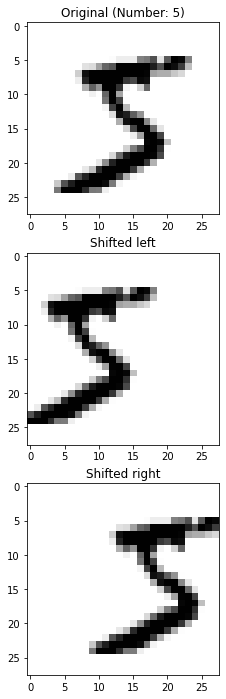

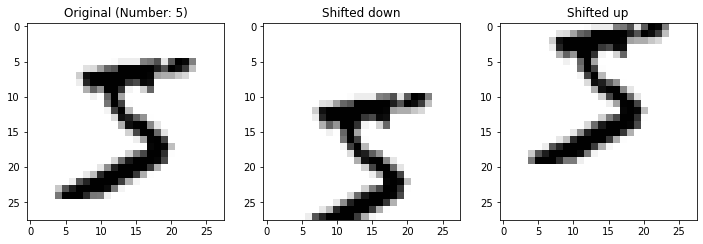

In [1026]:
from scipy.ndimage.interpolation import shift

digit = X_train.values[0].reshape(28, 28)
digit_shifted_left = shift(input = digit, shift = [0, -5])
digit_shifted_right = shift(input = digit, shift = [0, 5])
digit_shifted_down = shift(input = digit, shift = [5, 0])
digit_shifted_up = shift(input = digit, shift = [-5, 0])

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (4, 12))
axes[0].imshow(X = digit, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[1].imshow(X = digit_shifted_left, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[2].imshow(X = digit_shifted_right, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[0].set_title(f'Original (Number: {y_train[0]})')
axes[1].set_title('Shifted left')
axes[2].set_title('Shifted right')
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
axes[0].imshow(X = digit, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[1].imshow(X = digit_shifted_down, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[2].imshow(X = digit_shifted_up, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[0].set_title(f'Original (Number: {y_train[0]})')
axes[1].set_title('Shifted down')
axes[2].set_title('Shifted up')
plt.show()

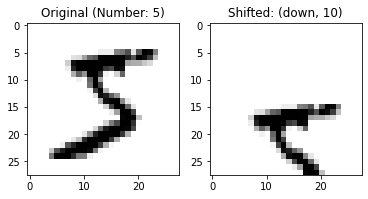

In [1057]:
def shift_image(image, direction, amount):
    digit = image.reshape(28, 28)
    if direction == 'left':
        return shift(input = digit, shift = [0, -1 * amount]).reshape(784)
    elif direction == 'right':
        return shift(input = digit, shift = [0, +1 * amount]).reshape(784)
    elif direction == 'down':
        return shift(input = digit, shift = [+1 * amount, 0]).reshape(784)
    elif direction == 'up':
        return shift(input = digit, shift = [-1 * amount, 0]).reshape(784)
    else:
        raise ValueError(direction)

direction = 'down'
amount = 10

image = X_train.values[0]
image_shifted = shift_image(image = image, direction = direction, amount = amount)
digit = image.reshape(28, 28)
digit_shifted = image_shifted.reshape(28, 28)
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].imshow(X = digit, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[1].imshow(X = digit_shifted, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[0].set_title(f'Original (Number: {y_train[0]})')
axes[1].set_title(f'Shifted: ({direction}, {amount})')
plt.show()

In [1121]:
shifted_images = []
shifted_labels = []
for image, label in zip(X_train.values, y_train):
    for direction in ('left', 'right', 'down', 'up'):
        amount = 1
        shifted_image = shift_image(image = image, direction = direction, amount = amount)
        shifted_images.append(shifted_image)
        shifted_labels.append(label)

In [1126]:
import pandas as pd

shifted_images = pd.DataFrame(data = shifted_images, columns = X_train.columns)
shifted_labels = pd.Series(shifted_labels)

In [1127]:
# column names must be the same for pandas.concat
assert list(X_train) == list(shifted_images)

assert len(X_train.values[0]) == len(shifted_images.values[0])

X_train_with_shifted_images = pd.concat(objs = [X_train, shifted_images], ignore_index = True)
y_train_with_shifted_images = y_train.append(shifted_labels, ignore_index = True)

assert len(X_train) + len(shifted_images) == len(X_train_with_shifted_images)
assert len(y_train) + len(shifted_labels) == len(y_train_with_shifted_images)

In [1153]:
# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
indices = np.random.permutation(len(X_train_with_shifted_images))
X_train_with_shifted_images = X_train_with_shifted_images.values[indices]
y_train_with_shifted_images = y_train_with_shifted_images[indices]

In [1166]:
from sklearn.base import clone
knn_clf = clone(estimator = grid_search.best_estimator_)
knn_clf.fit(X = X_train_with_shifted_images, y = y_train_with_shifted_images)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [1168]:
y_pred = knn_clf.predict(X = X_test)

In [1169]:
print(accuracy_score(y_true = y_test, y_pred = y_pred))

# manual calculation
number_correct = 0
for true, prediction in zip(y_test, y_pred):
    if true == prediction:
        number_correct += 1
print(number_correct / len(y_test))

0.9763
0.9763


## Author's method for exercise 2

In [1174]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(input = image, shift = [dy, dx])
    return shifted_image.reshape([-1])

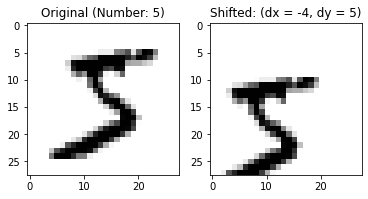

In [1176]:
dx = -4
dy = 5

image = X_train.values[0]
image_shifted = shift_image(image = image, dx = dx, dy = dy)
digit = image.reshape(28, 28)
digit_shifted = image_shifted.reshape(28, 28)
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].imshow(X = digit, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[1].imshow(X = digit_shifted, cmap = mpl.cm.binary, interpolation = 'nearest')
axes[0].set_title(f'Original (Number: {y_train[0]})')
axes[1].set_title(f'Shifted: (dx = {dx}, dy = {dy})')
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train.values]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train_augmented, y_train_augmented):
        X_train_augmented.append(shift_image(image = image, dx = dx, dy = dy))
        y_train_augmented.append(label)
    
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
shuffle_idx = np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X = X_train_augmented, y = y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X = X_test)

In [ ]:
print(accuracy_score(y_true = y_test, y_pred = y_pred))

# Exercise 3

In [914]:
import pandas as pd

train_path = 'datasets/titanic/train.csv'
test_path = 'datasets/titanic/test.csv'

passengers_train = pd.read_csv(filepath_or_buffer = train_path)

Exploratory data analysis to find correlations

In [915]:
print(passengers_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [916]:
passengers_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [917]:
passengers_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [918]:
passengers_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [919]:
print(passengers_train['Survived'].value_counts())

print(passengers_train.value_counts('Pclass'))

print(passengers_train['Sex'].value_counts())

print(passengers_train.value_counts('Embarked'))

0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
dtype: int64
male      577
female    314
Name: Sex, dtype: int64
Embarked
S    644
C    168
Q     77
dtype: int64


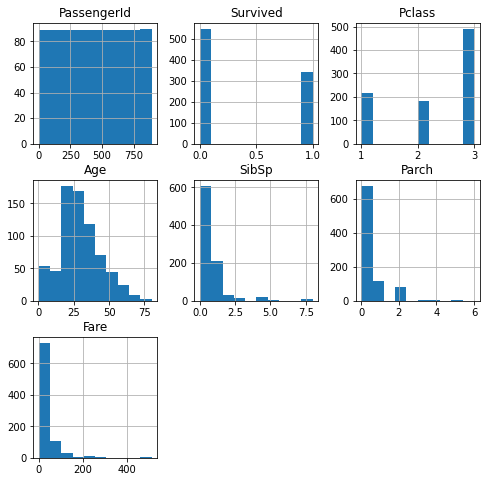

In [920]:
passengers_train.hist(figsize = (8, 8))
plt.show()

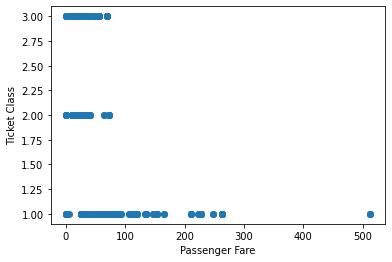

Ticket class 1 entries = 216
Ticket class 1 average = 84.1546875
Ticket class 1 median  = 60.287499999999994
Ticket class 2 entries = 184
Ticket class 2 average = 20.662183152173913
Ticket class 2 median  = 14.25
Ticket class 3 entries = 491
Ticket class 3 average = 13.675550101832993
Ticket class 3 median  = 8.05


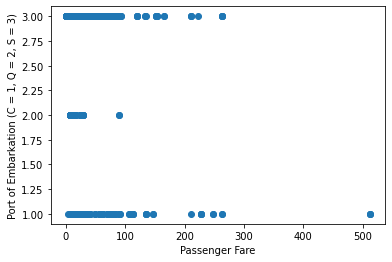

Port of embarkation C entries = 168
Port of embarkation C average = 59.95414404761905
Port of embarkation C median  = 29.7
Port of embarkation Q entries = 77
Port of embarkation Q average = 13.276029870129872
Port of embarkation Q median  = 7.75
Port of embarkation S entries = 644
Port of embarkation S average = 27.079811801242233
Port of embarkation S median  = 13.0


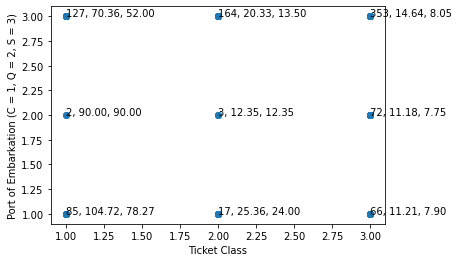

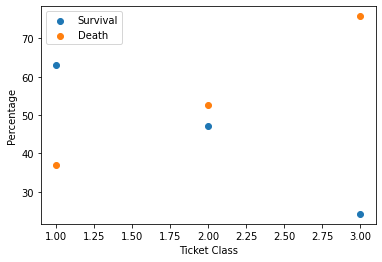

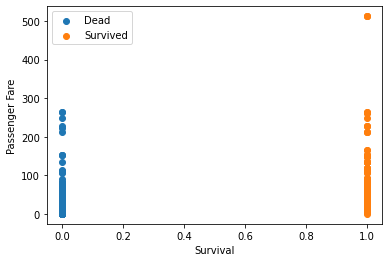

22.117886885245902
10.5
48.39540760233918
26.0


In [921]:
fig, axes = plt.subplots()
axes.scatter(x = passengers_train['Fare'], y = passengers_train['Pclass'])
axes.set_xlabel('Passenger Fare')
axes.set_ylabel('Ticket Class')
plt.show()

# The lower the ticket class, the higher the average/median passenger fare, as expected
# But how much of that also has to do with port of embarkation?
for ticket_class in (1, 2, 3):
    result = passengers_train.query(f'Pclass == {ticket_class}')['Fare']
    average = np.average(a = result)
    median = np.median(a = result)
    print(f'Ticket class {ticket_class} entries = {len(result)}')
    print(f'Ticket class {ticket_class} average = {average}')
    print(f'Ticket class {ticket_class} median  = {median}')
    
# https://stackoverflow.com/questions/49503173/pandas-dataframe-character-columns-to-integer
fig, axes = plt.subplots()
axes.scatter(x = passengers_train['Fare'], y = passengers_train['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}))
axes.set_xlabel('Passenger Fare')
axes.set_ylabel('Port of Embarkation (C = 1, Q = 2, S = 3)')
plt.show()

# "Collecting passengers" from https://en.wikipedia.org/wiki/Titanic
# Ignoring ticket class, since C = Cherbourg is the farthest away from the UK, so I would expect it to have the highest average/median passenger fare
for port in ('C', 'Q', 'S'):
    result = passengers_train.query(f'Embarked == "{port}"')['Fare']
    average = np.average(a = result)
    median = np.median(a = result)
    print(f'Port of embarkation {port} entries = {len(result)}')
    print(f'Port of embarkation {port} average = {average}')
    print(f'Port of embarkation {port} median  = {median}')

fig, axes = plt.subplots()
axes.scatter(x = passengers_train['Pclass'], y = passengers_train['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}))
axes.set_xlabel('Ticket Class')
axes.set_ylabel('Port of Embarkation (C = 1, Q = 2, S = 3)')
for ticket_class in (1, 2, 3):
    for port in ('C', 'Q', 'S'):
        result = passengers_train.query(f'Pclass == {ticket_class} and Embarked == "{port}"')['Fare']
        average = np.average(a = result)
        median = np.median(a = result)
        #print(f'Ticket class = {ticket_class}, Port = {port}, {len(result)}, \t {average}, \t {median}')
        mapping = {'C': 1, 'Q': 2, 'S': 3}
        axes.text(x = ticket_class, y = mapping[port], s = f'{len(result)}, {average:.2f}, {median:.2f}')
plt.show()

# If I sum the number of entries in the rows/columns of the last plot, I should obtain the number of entries in the first two plots
# I am able to reproduce the number of entries for port of embarkation, but not for one of the groupings of ticket class (127 + 2 + 85 = 214 vs. 216), which is very confusing

# The lower the ticket class, the higher the survival, as expected
ticket_classes = []
survival_percentages = []
for ticket_class in (1, 2, 3):
    number_dead  = len(passengers_train.query(f'Survived == 0 and Pclass == {ticket_class}'))
    number_alive = len(passengers_train.query(f'Survived == 1 and Pclass == {ticket_class}'))
    ticket_classes.append(ticket_class)
    survival_percentages.append(number_alive / (number_dead + number_alive) * 100)

fig, axes = plt.subplots()
axes.scatter(x = ticket_classes, y = survival_percentages, label = 'Survival')
axes.scatter(x = ticket_classes, y = [100 - percentage for percentage in survival_percentages], label = 'Death')
axes.set_xlabel('Ticket Class')
axes.set_ylabel('Percentage')
axes.legend()
plt.show()

# The higher the passenger fare, the higher the survival, as expected
passenger_fares_dead  = passengers_train.query('Survived == 0')['Fare']
passenger_fares_alive = passengers_train.query('Survived == 1')['Fare']
fig, axes = plt.subplots()
axes.scatter(x = [0] * len(passenger_fares_dead),  y = passenger_fares_dead, label = 'Dead')
axes.scatter(x = [1] * len(passenger_fares_alive), y = passenger_fares_alive, label = 'Survived')
axes.set_xlabel('Survival')
axes.set_ylabel('Passenger Fare')
axes.legend()
plt.show()

print(np.average(passenger_fares_dead))
print(np.median(passenger_fares_dead))
print(np.average(passenger_fares_alive))
print(np.median(passenger_fares_alive))


In [922]:
# This makes sense, based on the above plots
correlation_matrix = passengers_train.corr()
print(correlation_matrix['Survived'].sort_values(ascending = False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


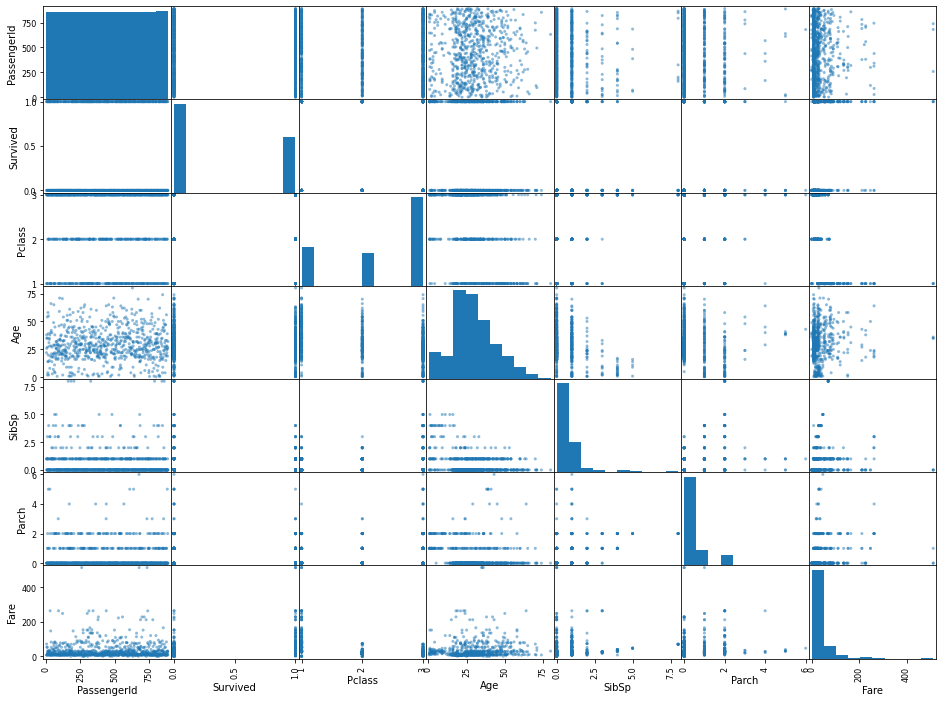

In [923]:
from pandas.plotting import scatter_matrix

attributes = [attribute for attribute, datatype in zip(passengers_train.columns, passengers_train.dtypes) if datatype != 'object']
scatter_matrix(frame = passengers_train[attributes], figsize = (16, 12))
plt.show()

Experimenting with Attribute Combinations

In [924]:
passengers_train['fare_per_ticket_class'] = passengers_train['Fare'] / passengers_train['Pclass']
passengers_train['fare_per_port_of_embarkation'] = passengers_train['Fare'] / passengers_train['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
correlation_matrix = passengers_train.corr()
print(correlation_matrix['Survived'].sort_values(ascending = False))

passengers_train.drop(columns = ['fare_per_ticket_class', 'fare_per_port_of_embarkation'], inplace = True)

Survived                        1.000000
fare_per_ticket_class           0.267627
Fare                            0.257307
fare_per_port_of_embarkation    0.227171
Parch                           0.081629
PassengerId                    -0.005007
SibSp                          -0.035322
Age                            -0.077221
Pclass                         -0.338481
Name: Survived, dtype: float64


Prepare the data for machine learning algorithms

In [925]:
# Need to impute Age
# After imputing, will need to recalculate attribute combinations if those are bring used (like when numerical_pipeline is created in chapter 2)
for column in passengers_train:
    print(column, passengers_train[column].isnull().values.any())

PassengerId False
Survived False
Pclass False
Name False
Sex False
Age True
SibSp False
Parch False
Ticket False
Fare False
Cabin True
Embarked True


In [926]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# From chapter 2
# Use this to add attributes to the pipeline?
# I should do this after the data has been imputed and scaled
# Then I should scale the combined attributes
Pclass_index = passengers_train.columns.tolist().index('Pclass')
Fare_index = passengers_train.columns.tolist().index('Fare')
Embarked_index = passengers_train.columns.tolist().index('Embarked')
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kwargs
        pass
    def fit(self, X, y = None):
        return self # nothing else to do
    def transform(self, X, y = None):
        fare_per_ticket_class = X[:, Fare_index] / X[:, Pclass_index]
        embarked_transformed = X[:, Embarked_index]
        print(embarked_transformed)
        for port, number in (('C', 1), ('Q', 2), ('S', 3)):
            embarked_transformed = np.char.replace(a = embarked_transformed, old = port, new = number)
        fare_per_port_of_embarkation = X[:, fare_index] / embarked_transformed
        return np.c_[X, fare_per_ticket_class, fare_per_port_of_embarkation] 

# Use format from https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('encoder', OneHotEncoder(sparse = True))
])

preprocessor = ColumnTransformer(
    transformers = [
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
])

passengers_numeric = passengers_train[numeric_features]
passengers_numeric_transformed = numeric_transformer.fit_transform(X = passengers_numeric)
print(passengers_numeric_transformed[0])
print('==========')

passengers_categorical = passengers_train[categorical_features]
passengers_categorical_transformed = categorical_transformer.fit_transform(X = passengers_categorical)
print(categorical_transformer.steps[1][1].categories_)
print(passengers_categorical_transformed.toarray()[0]) # If sparse = True for OneHotEncoder
print(passengers_categorical_transformed[0])
print(passengers_train.head(n = 1))
print('==========')

# 3 values for Pclass, 2 values for Sex, 3 values for Embarked
assert passengers_categorical_transformed.shape[1] == 3 + 2 + 3

passengers_prepared = preprocessor.fit_transform(X = passengers_train)
print(passengers_prepared)
print(passengers_prepared[0])
assert len(passengers_prepared[0]) == len(numeric_features) + 3 + 2 + 3

# remember, only fit data once, so after calling fit_transform, only call transform
some_data_prepared = preprocessor.transform(X = passengers_train.iloc[:1]) # transform, not fit_transform
print(some_data_prepared)

clf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', LinearRegression())
])

labels_train = passengers_train['Survived'].copy()

clf.fit(X = passengers_train, y = labels_train)

[-0.56573646  0.43279337 -0.47367361 -0.50244517]
[array([1, 2, 3], dtype=object), array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]
[0. 0. 1. 0. 1. 0. 0. 1.]
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 7)	1.0
   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
[[-0.56573646  0.43279337 -0.47367361 ...  0.          0.
   1.        ]
 [ 0.66386103  0.43279337 -0.47367361 ...  1.          0.
   0.        ]
 [-0.25833709 -0.4745452  -0.47367361 ...  0.          0.
   1.        ]
 ...
 [-0.1046374   0.43279337  2.00893337 ...  0.          0.
   1.        ]
 [-0.25833709 -0.4745452  -0.47367361 ...  1.          0.
   0.        ]
 [ 0.20276197 -0.4745452  -0.47367361 ...  0.          1.
   0.        ]]
[-0.56573646  0.43279337 -0.47367361 -0.50244517  0.          0.
  1.          0. 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                   

In [927]:
some_data = passengers_train.iloc[:5]
some_labels = labels_train.iloc[:5]
some_predictions = clf.predict(X = some_data)

print(some_predictions)
print(np.around(a = some_predictions))
print(some_labels)

[0.08712106 0.92472548 0.60964037 0.86842154 0.05407538]
[0. 1. 1. 1. 0.]
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [928]:
from sklearn.metrics import mean_squared_error

passengers_predictions = clf.predict(X = passengers_train)

mse = mean_squared_error(y_true = labels_train, y_pred = passengers_predictions)
rmse = np.sqrt(mse)
print(rmse)
# Equation on page 42
print(np.sqrt(sum(np.power(pred - true, 2) / len(labels_train) for pred, true in zip(passengers_predictions, labels_train))))

0.37731652444632335
0.3773165244463234


In [929]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10, scoring = 'neg_mean_squared_error')
scores_rmse = np.sqrt(-1.0 * scores)

print(scores_rmse)
print(scores_rmse.mean())
print(scores_rmse.std())
print('=====')

# default scoring is r2 as shown in this cell
scores_default = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10)

print(scores_default)
print(scores_default.mean())
print(scores_default.std())
print('=====')

scores_r2 = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10, scoring = 'r2')

print(scores_r2)
print(scores_r2.mean())
print(scores_r2.std())
print('=====')

[0.3855463  0.37768271 0.39835882 0.39281851 0.39033457 0.37444115
 0.39368989 0.40535219 0.33181653 0.37428547]
0.38243261314283833
0.01949479230787666
=====
[0.39465451 0.1812428  0.32781737 0.38269653 0.372738   0.39113316
 0.37041564 0.29572368 0.50727707 0.39954015]
0.3623238923904197
0.07954705475592133
=====
[0.39465451 0.1812428  0.32781737 0.38269653 0.372738   0.39113316
 0.37041564 0.29572368 0.50727707 0.39954015]
0.3623238923904197
0.07954705475592133
=====


In [930]:
# Have to round
number_correct = sum(round(pred) == true for pred, true in zip(passengers_predictions, labels_train))
print(number_correct / len(labels_train))

0.797979797979798


In [931]:
from sklearn.tree import DecisionTreeRegressor

clf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeRegressor(random_state = 42))
])

clf.fit(X = passengers_train, y = labels_train)

scores_default = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10)

print(scores_default)
print(scores_default.mean())
print(scores_default.std())
print('=====')

scores_r2 = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10, scoring = 'r2')

print(scores_r2)
print(scores_r2.mean())
print(scores_r2.std())
print('=====')

[-0.0331825  -0.06134371 -0.06647634  0.00237093  0.12987197  0.28382963
  0.22061778 -0.03544372  0.07099616  0.28629299]
0.0797533175399186
0.1341795507984875
=====
[-0.0331825  -0.06134371 -0.06647634  0.00237093  0.12987197  0.28382963
  0.22061778 -0.03544372  0.07099616  0.28629299]
0.0797533175399186
0.1341795507984875
=====


In [932]:
passengers_predictions = clf.predict(X = passengers_train)

# Have to round
number_correct = sum(round(pred) == true for pred, true in zip(passengers_predictions, labels_train))
print(number_correct / len(labels_train))

0.9797979797979798


In [933]:
# Trying LogisticRegression as done at https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

from sklearn.linear_model import LogisticRegression

clf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
])

clf.fit(X = passengers_train, y = labels_train)

scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10)

print(scores)
print(scores.mean())
print(scores.std())
print('=====')

scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10, scoring = 'accuracy')

print(scores)
print(scores.mean())
print(scores.std())
print('=====')

passengers_predictions = clf.predict(X = passengers_train)

# With LogisticRegression, the predictions are either 0 or 1, so rounding is not necessary
number_correct = sum(pred == true for pred, true in zip(passengers_predictions, labels_train))
print(number_correct / len(labels_train))

[0.77777778 0.79775281 0.76404494 0.82022472 0.79775281 0.7752809
 0.78651685 0.78651685 0.83146067 0.85393258]
0.7991260923845193
0.026591760299625466
=====
[0.77777778 0.79775281 0.76404494 0.82022472 0.79775281 0.7752809
 0.78651685 0.78651685 0.83146067 0.85393258]
0.7991260923845193
0.026591760299625466
=====
0.8058361391694725


Instead of regression, try classification

In [934]:
from sklearn.svm import SVC

clf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', SVC(gamma = 'auto'))
])

clf.fit(X = passengers_train, y = labels_train)

# default scoring is 'accuracy' as shown in this cell
scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10)
print(scores)
print(scores.mean())
print(scores.std())

scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10, scoring = 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())

passengers_predictions = clf.predict(X = passengers_train)

# With classification the predictions are either 0 or 1, so rounding is not necessary
number_correct = sum(pred == true for pred, true in zip(passengers_predictions, labels_train))
print(number_correct / len(labels_train))

# If the numeric data is not scaled, then:
# scores.mean() = 0.7307116104868914
# scores.std() = 0.04175484084508327
# manual calculation of accuracy = 0.8877665544332211
# If the numeric data is scaled, then:
# scores.mean() = 0.8260549313358302
# scores.std() = 0.03177321569748131
# manual calculation of accuracy = 0.8327721661054994

[0.81111111 0.85393258 0.7752809  0.87640449 0.83146067 0.79775281
 0.82022472 0.78651685 0.85393258 0.85393258]
0.8260549313358302
0.03177321569748131
[0.81111111 0.85393258 0.7752809  0.87640449 0.83146067 0.79775281
 0.82022472 0.78651685 0.85393258 0.85393258]
0.8260549313358302
0.03177321569748131
0.8327721661054994


In [935]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators = 100, random_state = 42))
])

clf.fit(X = passengers_train, y = labels_train)

# default scoring is 'accuracy' as shown in this cell
scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10)
print(scores)
print(scores.mean())
print(scores.std())

scores = cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10, scoring = 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())

passengers_predictions = clf.predict(X = passengers_train)

# Unlike regression, with classification the predictions are either 0 or 1, so rounding is not necessary
number_correct = sum(pred == true for pred, true in zip(passengers_predictions, labels_train))
print(number_correct / len(labels_train))

[0.74444444 0.79775281 0.74157303 0.80898876 0.88764045 0.83146067
 0.83146067 0.7752809  0.84269663 0.84269663]
0.8103995006242197
0.04407030340795697
[0.74444444 0.79775281 0.74157303 0.80898876 0.88764045 0.83146067
 0.83146067 0.7752809  0.84269663 0.84269663]
0.8103995006242197
0.04407030340795697
0.9797979797979798


[array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
       0.79775281, 0.82022472, 0.78651685, 0.85393258, 0.85393258]), array([0.74444444, 0.79775281, 0.74157303, 0.80898876, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.84269663])]


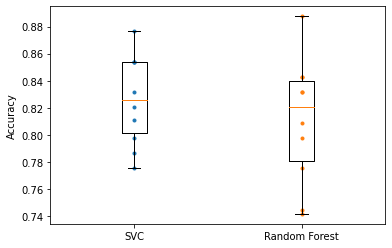

In [936]:
classifiers = [
    SVC(gamma = 'auto'),
    RandomForestClassifier(n_estimators = 100, random_state = 42)
]

scores = []
for classifier in classifiers:
    clf = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('classifier', classifier)
    ])

    clf.fit(X = passengers_train, y = labels_train)
    scores.append(cross_val_score(estimator = clf, X = passengers_train, y = labels_train, cv = 10))

print(scores)
fig, axes = plt.subplots()
axes.plot([1] * len(scores[0]), scores[0], marker = '.', linestyle = 'None')
axes.plot([2] * len(scores[1]), scores[1], marker = '.', linestyle = 'None')
axes.boxplot(x = [scores[0], scores[1]], labels = ['SVC', 'Random Forest'])
axes.set_ylabel('Accuracy')
plt.show()

Possibly interesting attributes to investigate later

In [938]:
passengers_train['age_bucket'] = passengers_train['Age'] // 15 * 15
passengers_train[['age_bucket', 'Survived']].groupby('age_bucket').mean()

,Survived
age_bucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [939]:
passengers_train['relatives_on_board'] = passengers_train['SibSp'] + passengers_train['Parch']
passengers_train[['relatives_on_board', 'Survived']].groupby('relatives_on_board').mean()

,Survived
relatives_on_board,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


# Exercise 4

In [1139]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = 'https://spamassassin.apache.org/old/publiccorpus/'
HAM_URL = DOWNLOAD_ROOT + '20030228_easy_ham.tar.bz2'
SPAM_URL = DOWNLOAD_ROOT + '20030228_spam.tar.bz2'
SPAM_PATH = os.path.join('datasets', 'spam')

def fetch_spam_data(ham_url = HAM_URL, spam_url = SPAM_URL, spam_path = SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (('ham.tar.bz2', ham_url), ('spam.tar.bz2', spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path = spam_path)
        tar_bz2_file.close()

In [1140]:
fetch_spam_data()

In [1141]:
HAM_DIR = os.path.join(SPAM_PATH, 'easy_ham')
SPAM_DIR = os.path.join(SPAM_PATH, 'spam')

ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

print(len(ham_filenames))
print(len(spam_filenames))

2500
500


In [1142]:
import email
import email.policy

def load_email(is_spam, filename, spam_path = SPAM_PATH):
    directory = 'spam' if is_spam else 'easy_ham'
    with open(os.path.join(spam_path, directory, filename), 'rb') as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)

In [1143]:
ham_emails = [load_email(is_spam = False, filename = name) for name in ham_filenames]
spam_emails = [load_email(is_spam = True, filename = name) for name in spam_filenames]

assert len(ham_filenames) == len(ham_emails)
assert len(spam_filenames) == len(spam_emails)

In [1144]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [1145]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [1146]:
print(set(type(email) for email in ham_emails))
print('=====')
print(set(type(email.get_payload()) for email in ham_emails))
print(type(ham_emails[0].get_payload()))
print(type(ham_emails[13].get_payload()))
print('=====')
for sub_email in ham_emails[13].get_payload():
    print(type(sub_email), type(sub_email.get_payload()))
print('=====')
    
print(ham_emails[0].get_payload())

for sub_email in ham_emails[13].get_payload():
    print(sub_email)
    print('\n\n\n\n\n')
    print('=====')
    print('\n\n\n\n\n')

{<class 'email.message.EmailMessage'>}
=====
{<class 'list'>, <class 'str'>}
<class 'str'>
<class 'list'>
=====
<class 'email.message.EmailMessage'> <class 'str'>
<class 'email.message.EmailMessage'> <class 'str'>
=====
    Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -r

In [1147]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return 'multipart({})'.format(', '.join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()
    

In [1148]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [1149]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [1150]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [1151]:
for header, value in spam_emails[0].items():
    print(header, ':', value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [1152]:
spam_emails[0]['Subject']

'Life Insurance - Why Pay More?'

In [1153]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype = object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [1154]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags = re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags = re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags = re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags = re.M | re.S)
    return unescape(text)

In [1155]:
html_spam_emails = [email for email in X_train[y_train == 1]
                    if get_email_structure(email) == 'text/html']

sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().rstrip())

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [1156]:
print(html_to_plain_text(sample_html_spam.get_content().rstrip()))


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [1157]:
def email_to_text(email):
    html = None
    for part in email.walk():
        content_type = part.get_content_type()
        if not content_type in ('text/plain', 'text/html'):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if content_type == 'text/plain':
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [1158]:
print(email_to_text(sample_html_spam))


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [1159]:
try:
    import nltk
    stemmer = nltk.PorterStemmer()
    for word in ('Computations', 'Computation', 'Computing', 'Computed', 'Compute', 'Compulsive'):
        print(word, '=>', stemmer.stem(word))
except ImportError:
    print('Error: stemming requires the NLTK module.')
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [1160]:
try:
    import urlextract
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls('Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s'))
except ImportError:
          print('Error: replacing URLs requires the urlextract module')
          url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [1161]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers = True, lower_case = True, remove_punctuation = True, replace_urls = True, replace_numbers = True, stemming = True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ''
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key = lambda url: len(url), reverse = True)
                for url in urls:
                    text = text.replace(url, ' URL ')
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags = re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [1162]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X = X_few)
print(X_few_wordcounts)

[Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1})
 Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom': 1, 'most':

In [1163]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size = 1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y = None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y = None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape = (len(X), self.vocabulary_size + 1))
            

In [1164]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size = 10)
X_few_vectors = vocab_transformer.fit_transform(X = X_few_wordcounts)
print(repr(X_few_vectors))

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>


In [1165]:
print(X_few_vectors.toarray())

[[ 6  0  0  0  0  0  0  0  0  0  0]
 [99 11  9  8  3  1  3  1  3  2  3]
 [67  0  1  2  3  4  1  2  0  1  0]]


In [1166]:
print(vocab_transformer.vocabulary_)

{'the': 1, 'of': 2, 'and': 3, 'to': 4, 'url': 5, 'all': 6, 'in': 7, 'christian': 8, 'on': 9, 'by': 10}


In [1167]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline(
    steps = [
        ('email_to_wordcount', EmailToWordCounterTransformer()),
        ('wordcount_to_vector', WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X = X_train)

In [1168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 42)
scores = cross_val_score(estimator = log_clf, X = X_train_transformed, y = y_train, cv = 3, verbose = 3)

print('=====')
print(scores)
print(scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.981) total time=   0.1s
[CV] END ................................ score: (test=0.984) total time=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.990) total time=   0.3s
=====
[0.98125 0.98375 0.99   ]
0.985


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished


In [1169]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X = X_test) # remember, fit_transform on training set, transform on test set

log_clf = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 42)
log_clf.fit(X = X_train_transformed, y = y_train)

y_pred = log_clf.predict(X = X_test_transformed)

print(f'Precision: {100 * precision_score(y_true = y_test, y_pred = y_pred):.2f}%')
print(f'Recall: {100 * recall_score(y_true = y_test, y_pred = y_pred):.2f}%')

Precision: 96.88%
Recall: 97.89%
